In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

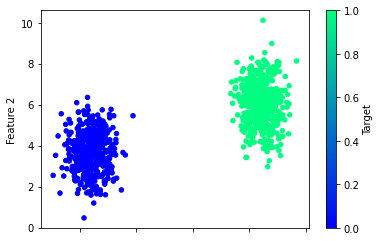

In [6]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)
# creating dataframe with dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [7]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=78)

In [8]:
# Create scalar instance
X_scaler = skl.preprocessing.StandardScaler()
# Fit the scaler
X_scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 746us/step - loss: 0.9329 - accuracy: 6.2674e-04
Epoch 2/100
24/24 [==============================] - 0s 735us/step - loss: 0.8994 - accuracy: 0.0012
Epoch 3/100
24/24 [==============================] - 0s 789us/step - loss: 0.8821 - accuracy: 0.0039
Epoch 4/100
24/24 [==============================] - 0s 793us/step - loss: 0.8460 - accuracy: 0.0148
Epoch 5/100
24/24 [==============================] - 0s 752us/step - loss: 0.8395 - accuracy: 0.0154
Epoch 6/100
24/24 [==============================] - 0s 741us/step - loss: 0.8178 - accuracy: 0.0320
Epoch 7/100
24/24 [==============================] - 0s 734us/step - loss: 0.8002 - accuracy: 0.0606
Epoch 8/100
24/24 [==============================] - 0s 743us/step - loss: 0.7891 - accuracy: 0.0937
Epoch 9/100
24/24 [==============================] - 0s 764us/step - loss: 0.7823 - accuracy: 0.1080
Epoch 10/100
24/24 [==============================] - 0s 750us/step - loss: 0.7689 - ac

24/24 [==============================] - 0s 713us/step - loss: 0.3647 - accuracy: 0.9283
Epoch 82/100
24/24 [==============================] - 0s 839us/step - loss: 0.3433 - accuracy: 0.9356
Epoch 83/100
24/24 [==============================] - 0s 746us/step - loss: 0.3507 - accuracy: 0.9287
Epoch 84/100
24/24 [==============================] - 0s 727us/step - loss: 0.3254 - accuracy: 0.9434
Epoch 85/100
24/24 [==============================] - 0s 693us/step - loss: 0.3385 - accuracy: 0.9361
Epoch 86/100
24/24 [==============================] - 0s 720us/step - loss: 0.3067 - accuracy: 0.9483
Epoch 87/100
24/24 [==============================] - 0s 720us/step - loss: 0.3172 - accuracy: 0.9415
Epoch 88/100
24/24 [==============================] - 0s 705us/step - loss: 0.2936 - accuracy: 0.9570
Epoch 89/100
24/24 [==============================] - 0s 705us/step - loss: 0.2982 - accuracy: 0.9499
Epoch 90/100
24/24 [==============================] - 0s 686us/step - loss: 0.2890 - accuracy: 

<AxesSubplot:>

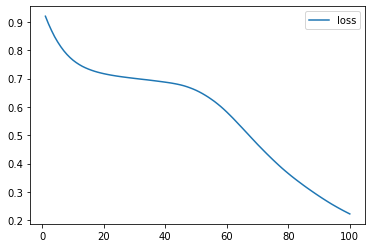

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot:>

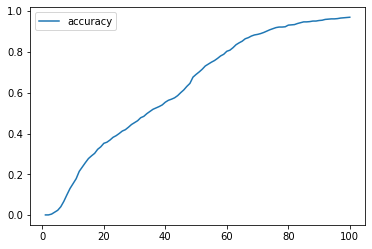

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2059 - accuracy: 0.9760
Loss: 0.20591706037521362, Accuracy: 0.9760000109672546


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

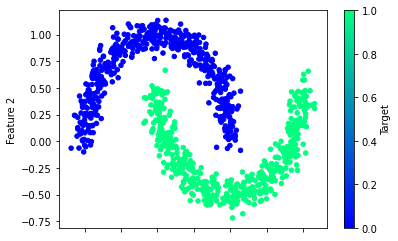

In [19]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [20]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [21]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.4196 - accuracy: 0.2813
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2540 - accuracy: 0.2973
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1382 - accuracy: 0.3120
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0561 - accuracy: 0.3280
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9967 - accuracy: 0.3507
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9507 - accuracy: 0.3600
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9152 - accuracy: 0.3773
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8851 - accuracy: 0.3880
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8600 - accuracy: 0.4000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8381 - accuracy: 0.4200
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7587
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7613
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7627
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7653
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7680
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7707
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7693
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7720
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7720
Epoch 91/100
24/24 [==============================] - 0s 979us/step - loss: 0.4627 - accuracy: 0.7733
Epoch 92/10

<AxesSubplot:>

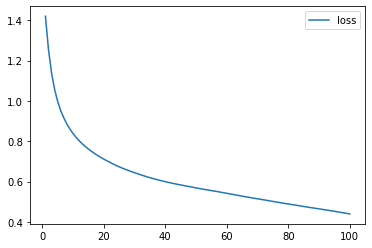

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

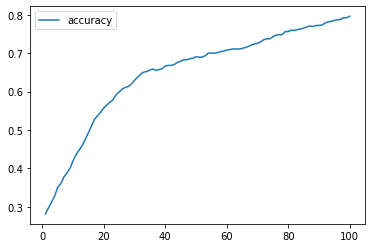

In [23]:
# Plot the loss
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 745us/step - loss: 0.7722 - accuracy: 0.5598
Epoch 2/100
24/24 [==============================] - 0s 791us/step - loss: 0.7406 - accuracy: 0.5509
Epoch 3/100
24/24 [==============================] - 0s 783us/step - loss: 0.6705 - accuracy: 0.5848
Epoch 4/100
24/24 [==============================] - 0s 799us/step - loss: 0.6239 - accuracy: 0.5924
Epoch 5/100
24/24 [==============================] - 0s 787us/step - loss: 0.5858 - accuracy: 0.6153
Epoch 6/100
24/24 [==============================] - 0s 769us/step - loss: 0.5447 - accuracy: 0.6264
Epoch 7/100
24/24 [==============================] - 0s 787us/step - loss: 0.5095 - accuracy: 0.6441
Epoch 8/100
24/24 [==============================] - 0s 786us/step - loss: 0.5029 - accuracy: 0.7117
Epoch 9/100
24/24 [==============================] - 0s 873us/step - loss: 0.4590 - accuracy: 0.8152
Epoch 10/100
24/24 [==============================] - 0s 737us/step - loss: 0.4339 - accura

24/24 [==============================] - 0s 642us/step - loss: 0.2367 - accuracy: 0.8949
Epoch 82/100
24/24 [==============================] - 0s 742us/step - loss: 0.2466 - accuracy: 0.8888
Epoch 83/100
24/24 [==============================] - 0s 791us/step - loss: 0.2607 - accuracy: 0.8857
Epoch 84/100
24/24 [==============================] - 0s 732us/step - loss: 0.2494 - accuracy: 0.8901
Epoch 85/100
24/24 [==============================] - 0s 756us/step - loss: 0.2360 - accuracy: 0.8962
Epoch 86/100
24/24 [==============================] - 0s 741us/step - loss: 0.2343 - accuracy: 0.8962
Epoch 87/100
24/24 [==============================] - 0s 724us/step - loss: 0.2340 - accuracy: 0.8961
Epoch 88/100
24/24 [==============================] - 0s 721us/step - loss: 0.2487 - accuracy: 0.8926
Epoch 89/100
24/24 [==============================] - 0s 756us/step - loss: 0.2717 - accuracy: 0.8764
Epoch 90/100
24/24 [==============================] - 0s 717us/step - loss: 0.2376 - accuracy: 